# Headline Project EDA

### Loading log of training filepaths

In [95]:
import os
import csv
import pandas as pd
from NYT_parser import NYTArticle
from utilities import *

nyt_path = './data/nyt/' # points to folder containing the years folders of the NYT Annotated corpus 
log_path = './logs/' # points to folder containing all the logs
all_data_log = log_path + 'all_data.log' # points to file containing filepaths for all NYT xml files

with open(all_data_log) as logfile:
    path_list = list(csv.reader(logfile))

all_paths = []
for path in path_list:
    all_paths.append(path[0])

### Look at one article

In [96]:
article = NYTArticle.from_file(os.path.join(nyt_path, all_paths[5000]))

In [97]:
# how does this differ from the headline??
article.title

'Advertising; Retail Chain Chooses Kornhauser & Calene'

In [98]:
# document ID (filename)
article.docid

'5000'

In [99]:
# date in a datetime format
article.date

datetime.datetime(1987, 1, 19, 0, 0)

In [100]:
# summary -- few docs seem to have?
article.summary

[]

In [101]:
# dateline -- location (city, state) and pub date
article.dateline

[]

In [102]:
# headline that ran in the print edition
article.print_hede

['Advertising; Retail Chain Chooses Kornhauser & Calene']

In [103]:
# headline that ran on the website version
article.online_hede

[]

In [104]:
# opening paragraph
article.lede

["LEAD: Gentlemen's Wear-House, operator of a 29-unit retail chain, has assigned its $2 million account to Kornhauser & Calene. The previous agency was MJA Advertising Associates."]

In [105]:
# topic tags
article.descriptors

['advertising', 'apparel', 'retail stores and trade']

In [106]:
# more extensive tags?
article.general_descriptors

['advertising and marketing', 'apparel', 'retail stores and trade']

In [107]:
# more extensive tags?
article.types_of_material

[]

In [108]:
article.wordcount

'50'

In [109]:
# section of the print newspaper
article.section

'D'

In [110]:
# body text but also includes subhead, book title data, endbyline, section title -- all kinds of stuff
article.paragraphs

["LEAD: Gentlemen's Wear-House, operator of a 29-unit retail chain, has assigned its $2 million account to Kornhauser & Calene. The previous agency was MJA Advertising Associates.",
 "Gentlemen's Wear-House, operator of a 29-unit retail chain, has assigned its $2 million account to Kornhauser & Calene. The previous agency was MJA Advertising Associates.",
 'The client, with outlets from Massachusetts to Tennessee for American-made apparel, is scheduled to open two more in March.']

### Explore sample of training data set

2006/03/20/1748240.xml


/home/arnoldyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 1.000e+01,
        2.900e+01, 5.000e+01, 2.060e+02, 4.540e+02, 6.310e+02, 8.050e+02,
        9.890e+02, 8.950e+02, 7.220e+02, 1.023e+03, 1.696e+03, 1.553e+03,
        5.890e+02, 1.380e+02, 4.100e+01, 6.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. ]),
 <a list of 25 Patch objects>)

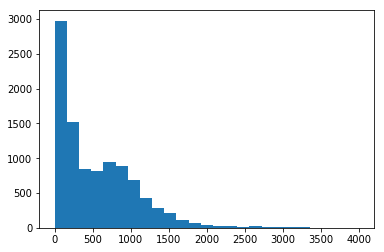

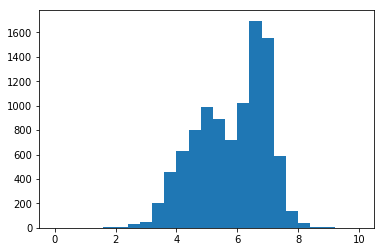

In [111]:
# Sample 10,000 random articles for analysis (entire data set is too large)
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SAMPLE_SIZE = 10000
random.seed(10)
sample_paths = random.sample(set(all_paths), SAMPLE_SIZE)
word_counts = []
category_counts = {}

for path in sample_paths:
    try:
        article = NYTArticle.from_file(os.path.join(nyt_path,path))
        word_counts.append(int(article.wordcount))
        for category in article.descriptors:
            if category in category_counts.keys():
                category_counts[category] += 1
            else:
                category_counts[category] = 1
    except:
        # need to figure out why these are throwing an exception
        print(path)
        word_counts.append(1)

# excluding some outliers from plotting window
plt.hist(word_counts, bins=25, range=(0, 4000))

plt.figure()
plt.hist(np.log(word_counts), bins=25, range=(0, 10))

# print(max(word_counts))
# print(min(word_counts))

# for a given article length threshold, how many words would we be throwing out?
# print(len(word_counts>1500))

In [112]:
# Section counts
for key, value in category_counts.items():
    print(key, value)


children and youth 182
hispanic-americans 11
immigration and refugees 52
acrobats and acrobatics 1
families and family life 24
museums 18
theater 152
assassinations and attempted assassinations 17
biographical information 400
politics and government 275
budgets and budgeting 112
computers and information systems 30
drug abuse and traffic 59
finances 274
intelligence services 7
missiles 16
security and warning systems 29
united states armament and defense 248
united states foreign service 7
bankruptcies 24
correction stories 212
bonuses 3
corporations 15
disclosure of information 16
executives and management 40
federal taxes (us) 18
law and legislation 193
taxation 110
wages and salaries 62
art 161
auctions 28
awards, decorations and honors 50
collectors and collections 7
advertising and marketing 25
cellular telephones 21
computers and the internet 138
radio 16
ratings and rating systems 37
television 201
education and schools 172
third world and developing countries 10
airlines and ai

names, geographical 1
gifted students 1
guards 5
identity fraud 2
dvd (digital versatile disk) 5
vetoes (us) 7
shuvee handicap 1
bar codes 1
census 4
statistics 3
egyptian civilization 1
tombs and tombstones 1
yellow pages 2
quotas 2
landscaping 1
us-international relations-west germany 1
stock options and purchase plans 2
mercury (metal) 2
mercury (planet) 1
heart, artificial 1
feed 1
heroin 5
bail 4
mexican-americans 3
presidential election of 2008 7
passports 1
race 1
independence movements and secession 5
agency solicitations 1
holding companies 1
containers and packaging 2
fuel efficiency 3
jordanian-americans 1
carbon dioxide 5
global warming 7
x-rays 3
voice mail 1
nonprofit organizations 1
new england championships (bridge) 1
shiite muslims 2
sunni muslims 1
penny whistles 1
furniture 10
joint chiefs of staff (us) 1
passenger services 2
pensions 2
nightclubs and cabarets 5
lingerie 1
harps 1
holidays and special occasions 2
atp tour championship 1
united states open (tennis) 8


cayuga indians 1
monticello raceway 1
kickbacks 1
rent control 1
mayans 1
garbage 1
head start program 1
beards 1
americans abroad 1
roe v wade (supreme court decision) 1
christian herter house (nyc) 1
toronto international film festival 1
exxon valdez (ship) 1
musical instruments 1
sinfonia (electronic instrument) 1
beatifications and canonizations 1
st peter's basilica (rome) 1
reggae music 2
incometax 1
mexico-international relations-us 1
costumes, theatrical 1
finance briefs (nyt column) 1
jet fuel 2
country music 1
hurricane marilyn 1
hiking 1
law_and_legislation 1
disorderly conduct 1
vagrancy and vagrants 1
evolution 1
national debt (us) 1
b-52 airplane 1
jvc jazz festival 1
physical education and training 1
biodiesel fuel 1
diplomatic recognition 3
hit-and-run drivers 1
elevators and escalators 1
haggis 1
partnerships 1
interferon 1
intron a (drug) 1
ribavirin (drug) 1
armenians 1
exploration and explorers 2
louisiana purchase (1803) 1
hurricane iniki 1
queensboro bridge (nyc) 

In [113]:
# confirm filter works by showing articles that were filtered out
print("Filtered articles details (hede, wordcount, descriptors):")
num_filtered_out = 0
for path in sample_paths:
    article = NYTArticle.from_file(os.path.join('./data/nyt/',path))
    if article.pass_filters() == False:
        num_filtered_out += 1
        print(article.print_hede, article.wordcount, article.descriptors)

Filtered articles details (hede, wordcount, descriptors):
['FOR CHILDREN'] 1217 ['acrobats and acrobatics', 'families and family life', 'museums', 'theater']
["ASSASSINATION IN INDIA: Woman in the News; The Tragedy's New Player; Sonia Gandhi"] 1094 ['assassinations and attempted assassinations', 'biographical information', 'politics and government']
['Corrections'] 142 ['bankruptcies', 'correction stories']
['INSIDE ART'] 1076 ['art', 'auctions', 'awards, decorations and honors', 'collectors and collections', 'museums']
['Our Ratings, Ourselves'] 8357 ['advertising and marketing', 'cellular telephones', 'computers and the internet', 'radio', 'ratings and rating systems', 'television']
['BLACKBOARD'] 572 ['art', 'education and schools', 'third world and developing countries']
['Rocket Launching'] 70 ['astronautics', 'communications satellites', 'rockets and rocket propulsion']
['Book Publisher'] 189 ['biographical information']
['Economic Calendar'] 61 ['no index terms']
['CHRONICLE'] 1

['On Display at the Met'] 0 []
['Corrections'] 120 ['correction stories', 'diet and nutrition', 'education and schools', 'lunch and breakfast programs', 'oils and fats']
['THEATER GUIDE'] 4116 []
['Corrections'] 28 ['correction stories', 'politics and government']
['Merck Clarification'] 39 ['dividends', 'stocks and bonds']
["'I Am Very Sorry for What Happened'"] 0 ['ethics']
['Corrections'] 59 []
['Corrections'] 100 ['correction stories', 'sex crimes', 'united states armament and defense']
['PHOTO-OP'] 0 ['beaches']
['Finals Matchup'] 0 ['basketball', 'playoff games']
['Man of the Hour'] 0 ['blacks']
['Corrections'] 105 []
['Corrections'] 85 ['budgets and budgeting', 'company and organization profiles', 'correction stories', 'finances', 'opera']
['Accounts'] 221 ['account changes']
['CHRONICLE'] 183 []
['Demonstration Over Memorial'] 0 ['demonstrations and riots', 'fires and firefighters', 'monuments and memorials', 'terrorism', 'world trade center (nyc)']
["CONFRONTATION IN THE GULF 

['Corrections'] 45 ['correction stories', 'hockey, ice']
['People'] 87 ['appointments and executive changes']
['CHRONICLE'] 106 ['terms not available']
['CONFERENCE CALL'] 413 ['basketball']
["PHOTOGRAPHER'S JOURNAL"] 0 []
['CHRONICLE'] 337 ['television']
['Economic Calendar'] 64 ['no index terms']
['Miscellany'] 107 ['public relations and publicity']
['After-School Help'] 141 ['education and schools', 'reading and writing skills', 'standards and standardization', 'tutors and tutoring']
['NEWS SUMMARY'] 1032 ['no index terms']
["Don't Count on Carbon Dioxide to 'Enrich' the Earth;   What Plant Growth?"] 671 ['air pollution', 'weather']
['Dividend Meetings'] 104 ['dividends', 'stocks and bonds']
['Islands Apart'] 447 ['national parks, monuments and seashores']
['N.I.T. Final Is Set: S. Carolina vs. Michigan'] 0 ['basketball', 'national invitation tournament']
['Corrections'] 106 ['biographical information', 'correction stories', 'deaths (obituaries)']
['Wet, Wild ... Wisconsin?'] 2431 [

['View From a Reborn Winter Garden'] 0 ['airlines and airplanes', 'hijacking', 'restoration and rehabilitation', 'terrorism', 'winter garden (world financial center)', 'world financial center (nyc)', 'world trade center (nyc)']
['MUSIC'] 324 ['music', 'reviews']
["Confrontation in the Gulf;   To Baghdad, Poison Gas Is 'Poor Man's A-Bomb'"] 1014 ['chemical warfare', 'middle east-international relations-us', 'united states armament and defense', 'united states international relations']
['GUIDEPOST'] 196 ['apparel', 'children and youth', 'standards and standardization']
['Corrections'] 48 ['correction stories', 'earthquakes']
['A New Major Player Joins Winery Business'] 2168 ['alcoholic beverages', 'company and organization profiles', 'special sections', 'wines']
['CHRONICLE'] 186 []
['NEWS SUMMARY'] 1373 []
['Corrections'] 76 ['art', 'correction stories', 'new york city marble cemetery']
['SPARE TIMES: FOR CHILDREN'] 2983 []
['On Stage'] 1053 ['theater']
['Not Everything Is Bigger in Tex

['Traffic Alert'] 38 ['no index terms']
['Bridge'] 574 ['bridge (card game)']
['COMPANY BRIEFS'] 409 ['no index terms']
[] 203 ['athletics and sports', 'college athletics', 'robberies and thefts']
['Affinity Cards'] 162 ['credit cards and accounts']
['A Moment of Bliss in Brooklyn'] 0 []
['More on the World Cup'] 0 []
['Baby Talk'] 0 ['child care']
["In Public Housing, It's Work, Volunteer or Leave"] 2005 ['evictions', 'housing', 'law and legislation', 'public housing', 'volunteers']
[] 222 ['company reports']
['ART GUIDE'] 8607 []
['Most-Favored-Grape-Status'] 1078 ['wines']
["G.E.'s Ex-Chief to Pay for Perks, But the Question Is: How Much?"] 1360 ['biographical information', 'ethics', 'executives and management', 'fringe benefits', 'pensions and retirement plans']
['CORRECTIONS'] 37 ['correction stories', 'dow jones stock average', 'stocks and bonds']
['After the Rain, to Each His Own'] 0 ['weather']
['Common Ground'] 758 ['abortion', 'birth control and family planning', 'new models,

["Tolstoy's Dress Code: A moral schema, in which the impossibly chic are hung by a thread."] 1554 ['apparel']
['Corrections'] 34 ['correction stories']
['RNA Trades Bit Part for Starring Role in the Cell'] 2422 ['biology and biochemistry', 'dna (deoxyribonucleic acid)', 'genetic engineering', 'genetics and heredity', 'research', 'ribonucleic acid']
['Corrections'] 80 ['weddings and engagements']
['Surveilling Maskirovka'] 1065 ['english language', 'russian language']
['Parks Passport'] 176 ['national parks, monuments and seashores', 'nytravel', 'parks and other recreation areas', 'travel and vacations']
['A New Class of Troopers Ready to Hit the Road'] 0 ['police']
["Fine Dining On a Budget: Stratagems For the 1990's"] 2069 ['restaurants']
['April 30-May 6; No River Runs Through This'] 0 ['drought', 'weather']
['Family Fare'] 1003 ['gardens and gardening', 'music', 'theater']
['Corrections'] 36 ['biographical information', 'correction stories', 'deaths (obituaries)', 'music']
['CONNECT

['New Economy; The big recording companies might be able to embrace Internet sales if they could just find the right technology.'] 1259 ['computers and the internet', 'copyrights', 'music', 'recordings (audio)']
['Corrections'] 99 ['correction stories', 'historic buildings and sites', 'shopping centers']
['Corrections'] 57 ['advertising', 'correction stories']
['STREET LEVEL: Fresh Kills; The Dump Was Closed, But the Rancor Never Ends'] 760 []
['WEEKENDER GUIDE'] 989 ['entertainment and amusements']
['The Get; Upwardly Mobile'] 5 ['luggage']
['RESULTS PLUS'] 553 ['athletics and sports']
['Corrections'] 103 ['correction stories', 'television']
['At Least 226 Die in the Philippines as Overcrowded Boats Sink'] 0 ['accidents and safety', 'boats and boating', 'drownings']
['METROPOLITAN DIARY'] 714 []
['Tuned In'] 113 ['culture']
['Popular Demand'] 184 []
['The Empire That Henry Luce Built Now Works at Bolstering the Bottom Line'] 2605 ['company and organization profiles', 'finances', 'maga

['Corrections'] 98 ['correction stories']
['POSTINGS: $50 Million, 400,000-Square-Foot Building in Rockland County; For Mercedes-Benz, a Full-Size HQ'] 396 ['office buildings']
['Corrections'] 76 ['anti-semitism', 'correction stories', 'jews']
['Back to Work, And to Family, At Ground Zero; Hotel Employees Reunite After 9/11 and Joblessness'] 1608 ['airlines and airplanes', 'hijacking', 'hotels and motels', 'labor', 'restoration and rehabilitation', 'terrorism', 'unemployment', 'world trade center (nyc)']
["THE 1992 CAMPAIGN: Campaign Journal; Grace Under Pressure? It's Working for Clinton"] 997 ['presidential election of 1992']
['INSIDE'] 153 ['no index terms']
['BUSINESS DIGEST'] 596 []
['TRANSACTIONS'] 762 []
[] 108 ['finances', 'government bonds', 'interest (money)']
['Corrections'] 110 ['coaches and managers', 'correction stories', 'football']
['Paid Notice: Deaths  BRUMAN, MARY. (NEE KAISER)'] 14 []
['A Positive Culture For Making Profits; Buoyed by Mergers, Medical Labs Await Era

['Scuffling Words'] 0 ['demonstrations and riots', 'doctors', 'malpractice', 'medicine and health', 'suits and litigation']
['Corrections'] 127 ['correction stories', 'housing', 'zoning']
['INSIDE'] 57 ['terms not available']
['Paid Notice: Memorials  GARDIAN, VITOLD'] 17 []
['CABARET GUIDE'] 632 ['music', 'nightclubs and cabarets']
['Mothers Dear'] 1122 ['children and youth', 'welfare (us)']
['NEWS SUMMARY'] 968 []
["QUESTION OF THE WEEK: Next Week; Why Can't The Mets Hit Anymore?"] 60 ['baseball']
['FICTION'] 268 ['book reviews']
['Key Rates'] 96 []
['Bookshelf'] 282 ['book reviews']
['Corrections'] 41 ['correction stories', 'photography']
['COMPANY BRIEFS'] 90 ['mergers, acquisitions and divestitures', 'no index terms']
["A 60's Holdout and His Daughter, Living on an Island, Searching for an Epic"] 1068 ['motion pictures', 'reviews']
['THE 1992 CAMPAIGN: Political Week; If Clinton Leads Pack, Teeth Are at His Heels'] 839 ['presidential election of 1992']
['CHRONICLE'] 385 []
['CHRON

['Ultraconsumers'] 126 ['united states economy']
['Power Puffs'] 57 []
['ALSO INSIDE'] 131 ['no index terms']
['CONSUMER RATES'] 110 ['consumer rates (nyt column)']
['CHRONICLE'] 180 ['awards, decorations and honors']
['Corrections'] 36 ['terms not available']
['Corrections'] 27 []
['Key Rates'] 97 ['key rates (nyt column)']
['BUSINESS DIGEST'] 601 ['no index terms']
['Strudel Rhapsody'] 119 []
['An Unfashionable Neighbor'] 0 ['homeless persons', 'suits and litigation']
['Paid Notice: Memorials  KOPPELMAN, MORRIS'] 15 []
['INSIDE'] 168 ['no index terms']
['Residential Sales'] 538 []
['Corrections'] 71 ['antiques', 'correction stories']
['More Experts'] 117 ['computers and the internet']
['Proving Thomas Wolfe Wrong'] 2728 []
["Hell on Wheels, and Nerves; If Ever There Was a Mean Street, It's the Cross Bronx"] 1214 ['accidents and safety', 'commuting', 'delays (transportation)', 'roads and traffic']
['STILL GOING'] 96 ['perfumes']
['Corrections'] 79 ['correction stories', 'homeless pers

['In Search of Miracles On a Holy Day'] 0 ['easter', 'pilgrimages']
['The Politico'] 961 ['books and literature']
['THE GUIDE'] 585 []
['Movies'] 572 []
['Corrections'] 78 ['correction stories', 'presidential election of 2004']
['Honoring the Columbia Crew'] 0 ['accidents and safety', 'columbia (space shuttle)', 'space', 'space shuttle']
['World Briefing'] 1383 []
['METRO DIGEST'] 513 ['no index terms']
['Dividend Meetings'] 159 []
['Corrections'] 32 ['correction stories', 'gymnastics', 'olympic games (1996)']
['BUSINESS DIGEST'] 619 ['no index terms']
['Gauging Bisexuality'] 153 []
['Corrections'] 42 ['correction stories', 'dancing']
['Correction'] 51 ['correction stories', 'motion pictures']
['Good Disguise'] 727 ['apparel', 'philanthropy']
['Essex to Suffolk: 3 Country Inns'] 2385 ['hotels and motels', 'nytravel']
['Oh, the Tales A Secretary Could Tell!'] 2901 ['auctions', 'furniture', 'prices (fares, fees and rates)', 'records and achievements']
['Bush in Japan'] 0 ['biographical i

['Corrections'] 43 ['correction stories', 'ice skating']
['FINANCE BRIEFS'] 188 ['no index terms']
['Classical Briefs'] 225 ['music', 'reviews']
['SMOKING TOAD'] 73 ['drug abuse and traffic', 'hallucinatory drugs', 'toads']
['Gâteau Fabulous'] 1294 ['bakeries and baked products', 'cooking and cookbooks', 'marriages', 'recipes', 'special sections']
['Fort Lauderdale'] 243 ['travel and vacations']
['RESULTS PLUS'] 511 ['no index terms']
['Racial Clashes in Britain'] 0 ['bombs and explosives', 'demonstrations and riots']
['A Loaf of Bread, a Jug of Olive Oil, A Little Salt, Maybe, and Thou'] 200 ['ergonomics', 'kitchens']
['Corrections'] 36 ['correction stories', 'music']
['BIOGRAPHY OF A CANDIDATE: Man in the News; Making and Remaking a Political Identity: George Herbert Walker Bush'] 2965 ['biographical information', 'presidential election of 1992']
['SURE BET'] 84 ['wages and salaries']
['Correction'] 25 ['correction stories', 'puzzles']
['Paid Notice: Memorials  GUSOFF, GERRY'] 14 []


['Correction'] 61 ['correction stories', 'mutual funds', 'retirement', 'stocks and bonds']
['NCNB-Citizens'] 133 ['banks and banking', 'mergers, acquisitions and divestitures']
['Miscellany'] 196 ['advertising']
["Cities of Canvas Rise in Hurricane's Rubble"] 0 ['hurricanes and tropical storms', 'katrina (storm)']
['FOOTLIGHTS'] 695 ['art', 'festivals', 'hampton court palace', 'hampton court palace music festival', 'museum mile festival (nyc)', 'museums', 'music']
['Olympic Diary'] 812 ['bombs and bomb plots', 'olympic games (1996)', 'security andwarning systems', 'terrorism']
['Corrections'] 48 ['civil war and guerrilla warfare', 'correction stories', 'elections', 'international relations']
['Confrontation in the Gulf;   U.S. KEEPS KUWAIT MISSION OPEN, JOINING OTHERS IN DEFYING IRAQ; TOKYO FUNDS TO BACK EMBARGO'] 1520 ['terms not available']
['Virgin Territory'] 175 ['ratings and rating systems', 'television']
['Jessica Stockholder'] 263 ['art', 'reviews']
["If You're Thinking of Livi

['Corrections'] 66 ['biographical information', 'correction stories', 'deaths']
['F.Y.I.'] 718 ['beaches', 'monuments and memorials', 'music']
['Corrections'] 62 ['correction stories', 'theater']
['Norman Hill Towns of Sicily'] 3558 ['historic buildings and sites', 'history', 'nytravel', 'travel and vacations']
['INSIDE'] 162 []
['Collins Hospitalized'] 126 ['drug addiction and abuse', 'football']
['CORRECTION'] 58 []
['Putting It in Writing: Views of New Jersey -- FICTION; Sleuthing By the Shore'] 467 ['books and literature']
['John McGahern'] 316 []
['RESULTS PLUS'] 500 ['no index terms']
['Footlights'] 770 ['appointments and executive changes', 'biographical information', 'culture', 'motion pictures', 'music']
['Dividend Meetings'] 52 []
['Science Chronicle'] 1341 ['biology and biochemistry', 'books and literature', 'dna (deoxyribonucleic acid)', 'genetics and heredity']
['The Way We Live Now: 12-03-00: Questions for William Bastone and Daniel Green; Paper Trailblazers'] 710 ['compu

In [114]:
print("Out of a sample of", SAMPLE_SIZE, "docs,", num_filtered_out,"were filtered out.")

Out of a sample of 10000 docs, 1591 were filtered out.
